In [1]:
import numpy as np #for linear algebra
import pandas as pd   #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Assets/Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.drop('User ID',axis=1,inplace=True)


In [5]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
#Machine only understands number so for converting categorical data in numbers we use map function

df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [10]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [12]:
#Standard Scaler-used in knn ,svm,pca,and all distance based algorithms.
#makes mean=0,var=1

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
np.round(X_train.describe(),decimals=2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.5,37.87,70281.25
std,0.5,10.21,34430.55
min,0.0,18.00,15000.00
25%,0.0,30.00,43000.00
50%,0.5,37.00,71000.00
75%,1.0,45.00,88000.00
max,1.0,60.00,150000.00


In [15]:
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(x_test)


In [16]:
X_train_scaled=pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
x_test_scaled=pd.DataFrame(data=x_test_scaled,columns=X_train.columns)

In [17]:
np.round(X_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.0,-0.00,0.00
std,1.0,1.00,1.00
min,-1.0,-1.95,-1.61
25%,-1.0,-0.77,-0.79
50%,0.0,-0.09,0.02
75%,1.0,0.70,0.52
max,1.0,2.17,2.32


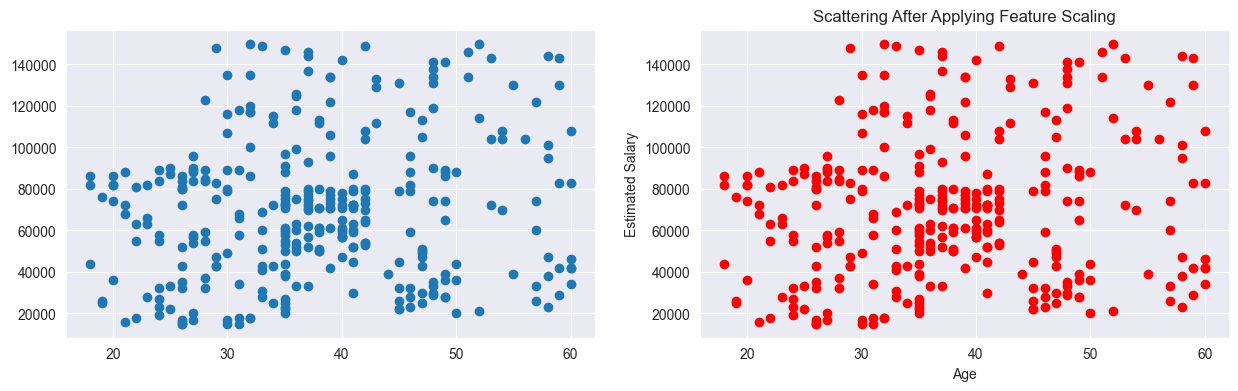

In [20]:
fig,(x1,x2)=plt.subplots(1,2,figsize=(15,4))
x1.scatter(X_train['Age'],X_train['EstimatedSalary'])
plt.title('Scattering Before Applying Feature Scaling')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')


x2.scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
plt.title('Scattering After Applying Feature Scaling')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

